# Craigslist Vehicle Listing Dataset

### Exploratory Data Analysis & the ETL Process

---

### Objective

The goal of this project is to practice my SQL and Python skills using a real-world dataset. As a car enthusiast and someone who has spent a lot of time on Craigslist buying and selling bicycles, I designed this project around a Kaggle dataset I found that has automotive classified listings from Craigslist. 

<b>The steps will be as follows:</b>

EXTRACT data from a database of Craigslist vehicle postings found on Kaggle into a Pandas DataFrame.

(Source: https://www.kaggle.com/austinreese/craigslist-carstrucks-data)

Clean and TRANSFORM the data into a smaller, more useful and manageable set in order to extract insights and visualize trends.

Use SQLAlchemy and PostgreSQL to LOAD the dataset into a database. 

Also, save the cleaned dataset as a .csv file for use in future projects.

---

### Description of Data

 This data set consists of all vehicles listed to Craigslist in the US. It contains most all relevant information that Craigslist provides on car sales including columns like price, condition, manufacturer, latitude/longitude, and 18 other categories.
 
 ---


<b> Import Dependencies </b>

In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Extract & Explore Data

In [19]:
# Read the data from csv and put it in a dataframe

raw_df = pd.read_csv("../Resources/vehicles.csv")

raw_df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,drive,size,type,paint_color,image_url,description,county,state,lat,long
0,7184791621,https://duluth.craigslist.org/ctd/d/duluth-200...,duluth / superior,https://duluth.craigslist.org,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,...,4wd,NaN,NaN,red,https://images.craigslist.org/00n0n_f06ykBMcdh...,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,https://duluth.craigslist.org/cto/d/saginaw-20...,duluth / superior,https://duluth.craigslist.org,8750,2013.0,hyundai,sonata,excellent,4 cylinders,...,fwd,NaN,NaN,grey,https://images.craigslist.org/00d0d_kgZ6xoeRw2...,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,https://newhaven.craigslist.org/cto/d/stratfor...,new haven,https://newhaven.craigslist.org,10900,2013.0,toyota,prius,good,4 cylinders,...,fwd,NaN,NaN,blue,https://images.craigslist.org/00d0d_3sHGxPbY2O...,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,https://albuquerque.craigslist.org/cto/d/albuq...,albuquerque,https://albuquerque.craigslist.org,12500,2003.0,mitsubishi,lancer,good,4 cylinders,...,4wd,mid-size,sedan,grey,https://images.craigslist.org/00m0m_4a8Pb6JbMG...,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,https://duluth.craigslist.org/ctd/d/rush-city-...,duluth / superior,https://duluth.craigslist.org,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,...,4wd,full-size,truck,white,https://images.craigslist.org/01414_g093aPtSMW...,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [21]:
# explore column names

raw_df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'vin', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'county', 'state', 'lat', 'long'],
      dtype='object')

In [193]:
# Explore data set dimensions

raw_df.shape

# There are 423,857 listings, with 21 columns.

(423857, 21)

<b>The data set has 25 columns, but we will not need all  of them for this analysis.</b>

Since my goal is to practice SQL, I will turn this single dataset into a relational database, using the ID column as the primary key.

- Listings table: includes all the listing information that does not have to do with the location.
- Location table: includes region, county, state, latitude, and longitude columns.
- Description table: includes the descriptions for each listing
    
In order to mimic a project in which there are multiple data sources, I will separate the dataset into three different tables.
I will perform the transformation process on just the main Listings table, and will not touch the other two tables.
Once I have completed the bulk of the data transformation, I will join the data tables.
    
<b>Upon initial exploration, I do not see a use-case for the URL or VIN columns, so they will be dropped.</b>






In [22]:
raw_df.drop(['url','region_url','vin','image_url'], axis=1, inplace=True)
raw_df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,...,transmission,drive,size,type,paint_color,description,county,state,lat,long
0,7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,...,automatic,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,...,automatic,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,...,automatic,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,...,manual,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,...,automatic,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648


In [25]:
# Inspect the remaining columns
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423857 entries, 0 to 423856
Data columns (total 21 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            423857 non-null  int64  
 1   region        423857 non-null  object 
 2   price         423857 non-null  int64  
 3   year          328743 non-null  float64
 4   manufacturer  313242 non-null  object 
 5   model         325384 non-null  object 
 6   condition     176719 non-null  object 
 7   cylinders     197679 non-null  object 
 8   fuel          327214 non-null  object 
 9   odometer      270585 non-null  float64
 10  title_status  327759 non-null  object 
 11  transmission  328065 non-null  object 
 12  drive         231119 non-null  object 
 13  size          102627 non-null  object 
 14  type          241157 non-null  object 
 15  paint_color   222203 non-null  object 
 16  description   329654 non-null  object 
 17  county        0 non-null       float64
 18  stat

In [30]:
# Set index for the main dataframe

raw_df.set_index('id')

,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color,description,county,state,lat,long
id,,,,,,,,,,,,,,,,,,,,
7184791621,duluth / superior,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...,NaN,mn,46.8433,-92.2550
7184773187,duluth / superior,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey,For Sale: 2013 Hyundai Sonata GLS - $8750. O...,NaN,mn,46.9074,-92.4638
7193375964,new haven,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue,2013 Prius V Model Two. One owner—must sell my...,NaN,ct,41.1770,-73.1336
7195108810,albuquerque,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey,"2003 Mitsubishi Lancer Evolution, silver. Abo...",NaN,nm,35.1868,-106.6650
7184712241,duluth / superior,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white,"**Bad Credit, No Credit... No Problem!**2007 G...",NaN,mn,45.6836,-92.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7184919761,duluth / superior,1600,2006.0,hyundai,sonata,fair,6 cylinders,gas,159980.0,clean,automatic,fwd,NaN,sedan,blue,Motor runs and drives good. Transmission shift...,NaN,mn,46.8348,-92.0742
7184844576,duluth / superior,9000,2003.0,toyota,sequoia limited,excellent,8 cylinders,gas,160000.0,clean,automatic,4wd,full-size,SUV,green,"2 owner 0 rust not from here... Leather ,roof ...",NaN,mn,46.9369,-91.9325
7184805809,duluth / superior,700,1994.0,ford,f-150,fair,6 cylinders,gas,212000.0,clean,manual,rwd,NaN,NaN,green,I'm selling this beautiful old pickup that I j...,NaN,mn,46.7715,-92.1279


In [34]:
# Create Listings_df

listings_df = raw_df[['id','price','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','drive','size','type','paint_color']].copy()
listings_df.head()

,id,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
0,7184791621,6995,2000.0,gmc,new sierra 1500,excellent,8 cylinders,gas,167783.0,clean,automatic,4wd,NaN,NaN,red
1,7184773187,8750,2013.0,hyundai,sonata,excellent,4 cylinders,gas,90821.0,clean,automatic,fwd,NaN,NaN,grey
2,7193375964,10900,2013.0,toyota,prius,good,4 cylinders,hybrid,92800.0,clean,automatic,fwd,NaN,NaN,blue
3,7195108810,12500,2003.0,mitsubishi,lancer,good,4 cylinders,gas,NaN,clean,manual,4wd,mid-size,sedan,grey
4,7184712241,16995,2007.0,gmc,sierra classic 2500hd,good,8 cylinders,diesel,254217.0,clean,automatic,4wd,full-size,truck,white


In [35]:
# Create location df

location_df=raw_df[['id','region','county','state','lat','long']]
location_df.head()

,id,region,county,state,lat,long
0,7184791621,duluth / superior,NaN,mn,46.8433,-92.2550
1,7184773187,duluth / superior,NaN,mn,46.9074,-92.4638
2,7193375964,new haven,NaN,ct,41.1770,-73.1336
3,7195108810,albuquerque,NaN,nm,35.1868,-106.6650
4,7184712241,duluth / superior,NaN,mn,45.6836,-92.9648


In [36]:
# Create Description df

desc_df=raw_df[['id','description']]
desc_df.head()

,id,description
0,7184791621,2000 *** GMC New Sierra 1500 Ext Cab 157.5 WB...
1,7184773187,For Sale: 2013 Hyundai Sonata GLS - $8750. O...
2,7193375964,2013 Prius V Model Two. One owner—must sell my...
3,7195108810,"2003 Mitsubishi Lancer Evolution, silver. Abo..."
4,7184712241,"**Bad Credit, No Credit... No Problem!**2007 G..."


<b> Now that we have our three separated dataframes, we can being to TRANSFORM the Listings DataFrame. </b>

First, we will check for columns that have greater than 40% null values and remove them.
Then, we can drop rows with null values.

We will keep track of the number of rows along the way.

In [39]:
# Determine number of rows in listings_df

listings_df.shape

# We see that we are starting out with 423,857 vehicle listings.

(423857, 15)

In [48]:
# Determine number of nulls for each row

listings_df.isna().sum()

id                   0
price                0
year             95114
manufacturer    110615
model            98473
condition       247138
cylinders       226178
fuel             96643
odometer        153272
title_status     96098
transmission     95792
drive           192738
size            321230
type            182700
paint_color     201654
dtype: int64

In [194]:
# Create a function that drops columns with >40% null values

null_cols = listings_df.isna().sum()

def null_check(na, threshold = 0.4):
    null_check_pass = []
    
    for i in na.keys():
        if (na[i])/listings_df.shape[0]<threshold:
            null_check_pass.append(i)
    return null_check_pass

# Create a new DataFrame that houses the columns with <40% null values

clean_listings_df = listings_df[null_check(null_cols)]

In [195]:
# Let's see how many columns are left

clean_listings_df.shape

# There are 423,857 listings remaining

(423857, 9)

In [196]:
# We see that the number of columns was cut down from 16 to 9. Let's find out which columns remain

clean_listings_df.columns

# We can see that condition, cylinders, drive, size, type, and paint color were dropped

Index(['id', 'price', 'year', 'manufacturer', 'model', 'fuel', 'odometer',
       'title_status', 'transmission'],
      dtype='object')

In [197]:
# Now we need to drop rows with missing values.

clean_listings_df = clean_listings_df.dropna()

clean_listings_df.shape

# We now have 253,944 rows of data left, down from 423,857 (-63%)

(253944, 9)

<b> Inspect the remaining columns to see what data we have</b>

In [198]:
### Make sure there are no nulls

clean_listings_df.isna().sum()

# We have successfully removed null values, and are still left with over 250,000 listings.

id              0
price           0
year            0
manufacturer    0
model           0
fuel            0
odometer        0
title_status    0
transmission    0
dtype: int64

In [199]:
# Find unique values in each column and look for issues

# Categorical Columns
print('Categorical Columns: \n\n')
print(f'Unique Years: ',clean_listings_df.year.unique(),'\n')
print(f'Unique Manufacturers: ',clean_listings_df.manufacturer.unique(),'\n')
print(f'Unique Models: ',clean_listings_df.model.unique(),'\n')
print(f'Unique Fuel Types: ',clean_listings_df.fuel.unique(),'\n')
print(f'Unique Title Statuses: ',clean_listings_df.title_status.unique(),'\n')
print(f'Unique Transmission Types: ',clean_listings_df.transmission.unique(),'\n\n')

# Numberical Columns
print('Numerical Columns: \n\n')
clean_listings_df.describe()

Categorical Columns: 


Unique Years:  [2000. 2013. 2007. 2012. 2010. 2011. 2014. 2004. 2009. 2008. 1994. 1997.
 2019. 2015. 2003. 2016. 2006. 2017. 2005. 1964. 1998. 2001. 2002. 2018.
 1989. 1990. 1967. 1992. 1993. 1999. 1986. 1995. 1996. 2020. 1963. 1966.
 1983. 1972. 1952. 1987. 1981. 1991. 1979. 1960. 1927. 1973. 1977. 1959.
 1969. 1982. 1953. 1978. 1988. 1957. 1968. 1984. 1933. 1934. 1980. 1985.
 1970. 1974. 1971. 1962. 2021. 1965. 1941. 1919. 1939. 1948. 1940. 1932.
 1975. 1950. 1976. 1958. 1930. 1955. 1956. 1951. 1949. 1929. 1954. 1923.
 1931. 1961. 1936. 1921. 1947. 1946. 1937. 1935. 1926. 1928. 1924. 1938.
 1911. 1942.] 

Unique Manufacturers:  ['gmc' 'hyundai' 'toyota' 'ford' 'chevrolet' 'ram' 'buick' 'jeep' 'dodge'
 'subaru' 'nissan' 'audi' 'rover' 'lexus' 'honda' 'mini' 'mercedes-benz'
 'cadillac' 'bmw' 'kia' 'volvo' 'jaguar' 'chrysler' 'acura' 'mitsubishi'
 'mazda' 'volkswagen' 'pontiac' 'lincoln' 'infiniti' 'saturn' 'mercury'
 'ferrari' 'fiat' 'tesla' 'land rover' 'harley

,id,price,year,odometer
count,2.539440e+05,2.539440e+05,253944.000000,2.539440e+05
mean,7.189045e+09,2.646382e+04,2011.257793,9.879409e+04
std,4.749839e+06,5.014776e+06,7.537648,1.096470e+05
min,7.178302e+09,0.000000e+00,1911.000000,0.000000e+00
25%,7.185454e+09,5.490000e+03,2008.000000,4.500000e+04
50%,7.190017e+09,1.100000e+04,2013.000000,9.201150e+04
75%,7.193333e+09,1.995000e+04,2016.000000,1.372510e+05
max,7.195225e+09,2.490531e+09,2021.000000,1.000000e+07


<b> Upon inspection, we see a few things that need to be addressed:</b>

    - The minimum price is $0, which can not be true
    
    - The maximum price is over $2 Billion, which needs to be checked
    
    - Some things are misspelled or mislabeled, like "Porche" instead of "Porsche"
    
    - There is a manufacturer entry for "Harley Davidson", which is a motorcycle brand
    
    - The "minimum" of the year column is 1911. While it's possible this is a real listing, we should limit the dataset by removing outliers
    
    
    
    
<b> Let's start by plotting some charts to try and visualize outliers. </b>

<b> We can begin with price </b>


{'whiskers': [<matplotlib.lines.Line2D at 0x20ff11910>,
 'caps': [<matplotlib.lines.Line2D at 0x20ff04d10>,
 'boxes': [<matplotlib.lines.Line2D at 0x20ff04cd0>],
 'medians': [<matplotlib.lines.Line2D at 0x20ff17dd0>],
 'fliers': [],
 'means': []}

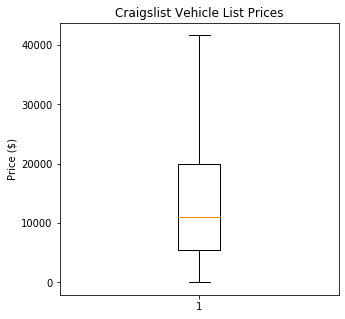

In [200]:
# Box plot on prices to see the normal range (not including outliers):

fig = plt.figure(figsize=(5,5))
plt.title("Craigslist Vehicle List Prices")
plt.ylabel("Price ($)")
plt.boxplot('price', data=clean_listings_df,showfliers=False)

# We see that values over $40,000 are considered outliers. 
# Considering that most cars on Craigslist are used, this number seems reasonable. 
# However, there are many cars that are worth over $40k used.

In [201]:
# Remove cars with $0 price

clean_listings_df = clean_listings_df[clean_listings_df['price']>0]

clean_listings_df.shape

# We have cut down the number of listings from 253,944 to 233,566 (-8%)

(233566, 9)

(array([2.33563e+05, 0.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([1.00000000e+00, 4.98106285e+07, 9.96212560e+07, 1.49431883e+08,
        1.99242511e+08, 2.49053138e+08, 2.98863766e+08, 3.48674393e+08,
        3.98485021e+08, 4.48295648e+08, 4.98106276e+08, 5.47916903e+08,
        5.97727531e+08, 6.47538158e+08, 6.97348786e+

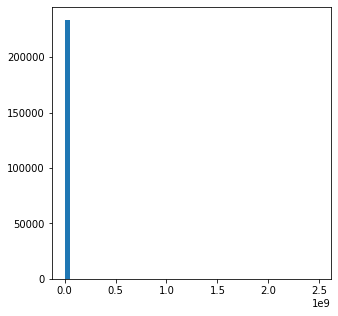

In [204]:
fig = plt.figure(figsize=(5,5))
plt.hist(clean_listings_df['price'],50)


In [205]:
# Since our  Let's take a look at the listings greater than $100,000 and see if we can exclude them

clean_listings_df[clean_listings_df['price']>100000]

# There are 203 listings above $100,000. This is an insignificant amount in relation to the size of our full data set, so we can safely exclude it.

# Downsides of excluding it are that we are losing listings for some high-dollar cars, such as Audi R8s and Ferraris.

# Based on this list, only a few of the cars should be at their listed prices. 
# In some cases, it appears there was an extra '0' added to the number, or two 0's if they are missing a decimal place.
# In others, it looks like a phone number was used in the list price section.
# There are also a few that look like they used an arbitrary number.
# Based on this list, we can ignore the listings above 

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission
807,7187052743,106899,2004.0,ferrari,360 modena spyder,gas,34123.0,clean,automatic
2735,7192116434,1495000,2014.0,lexus,is 250,gas,79577.0,clean,automatic
3778,7190627325,239999,1933.0,ford,victoria,gas,5.0,clean,automatic
5986,7194931599,137500,2017.0,audi,r8 spyder,gas,22752.0,clean,automatic
6099,7194507428,112900,2020.0,chevrolet,corvette,gas,718.0,clean,automatic
...,...,...,...,...,...,...,...,...,...
399412,7187548159,119995,2020.0,chevrolet,corvette stingray,gas,932.0,clean,automatic
402534,7184297439,124975,2015.0,audi,r8 v10,gas,16000.0,clean,automatic
409983,7193568300,104888,2020.0,chevrolet,corvette,gas,2011.0,clean,automatic
410000,7193567798,107888,2020.0,chevrolet,corvette,gas,84.0,clean,automatic


In [206]:
# Let's remove listings above $100,000.

clean_listings_df=clean_listings_df[clean_listings_df['price']<100000]
clean_listings_df.shape

# We have cut down the data set to 233,361 listings (-0.1%)

(233361, 9)

(array([6.3330e+03, 4.8540e+03, 7.9080e+03, 1.0696e+04, 1.1560e+04,
        1.2053e+04, 1.2157e+04, 1.1827e+04, 1.0883e+04, 1.0467e+04,
        8.1130e+03, 8.0760e+03, 8.3900e+03, 8.1850e+03, 8.4060e+03,
        7.5580e+03, 7.3270e+03, 6.5570e+03, 6.0190e+03, 6.4000e+03,
        3.5300e+03, 4.1660e+03, 3.8650e+03, 3.3400e+03, 3.6320e+03,
        2.4690e+03, 2.7530e+03, 2.7030e+03, 2.4080e+03, 3.1990e+03,
        1.3350e+03, 1.8030e+03, 1.7700e+03, 1.8660e+03, 2.2150e+03,
        1.3340e+03, 1.6470e+03, 1.3440e+03, 1.2360e+03, 1.9920e+03,
        5.0900e+02, 9.1400e+02, 9.4600e+02, 7.7800e+02, 9.0000e+02,
        5.1400e+02, 5.6400e+02, 4.8700e+02, 4.2400e+02, 7.8200e+02,
        1.3700e+02, 2.5700e+02, 3.2300e+02, 1.6900e+02, 2.4600e+02,
        1.9500e+02, 2.0300e+02, 2.0200e+02, 2.1100e+02, 3.6300e+02,
        6.0000e+01, 9.8000e+01, 1.8100e+02, 7.9000e+01, 1.4500e+02,
        1.4900e+02, 1.1000e+02, 1.1200e+02, 9.6000e+01, 1.7000e+02,
        2.8000e+01, 2.6000e+01, 7.9000e+01, 3.90

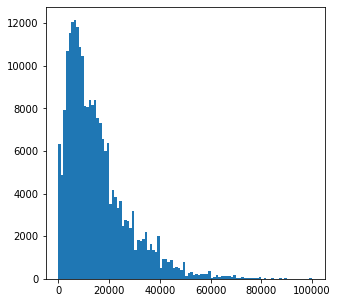

In [210]:
# Let's look at the histogram distribution again

fig = plt.figure(figsize=(5,5))
plt.hist(clean_listings_df['price'],100)


In [208]:
# Looking at listings between $80,000 and $100,000

clean_listings_df[clean_listings_df['price']>80000]

# We see that these 205 listings include some classic cars, high-end sports cars, and some late-model vehicles that retail for well over their asking prices. 
# Since these listings look reasonable, we will keep the upper limit of the dataset at $100,000

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission
1996,7187776823,81999,2019.0,ford,f350 powerstroke platinum,diesel,17328.0,clean,automatic
2396,7186006224,81999,2019.0,ford,f350 diesels powerstroke,diesel,17328.0,clean,automatic
2568,7185369022,81999,2019.0,ford,f350 diesel power stroke,diesel,17328.0,clean,automatic
2702,7194616684,89995,2020.0,ford,f-350 lifted platinum crew cab power stroke di...,other,12504.0,clean,automatic
3273,7189861089,88999,2010.0,ferrari,"california 19,000",gas,19000.0,clean,automatic
...,...,...,...,...,...,...,...,...,...
410758,7189182921,90000,2000.0,jeep,wrangler tj,gas,121000.0,lien,manual
411084,7188326497,89988,1970.0,chevrolet,chevelle,gas,51.0,clean,manual
418166,7190820613,87500,1970.0,dodge,coronet,gas,45606.0,clean,manual
419376,7190160495,96500,1969.0,chevrolet,camaro,gas,2829.0,clean,manual


In [211]:
# Now that we have pruned the top end of the dataset, let's look at listings with low prices.

clean_listings_df[clean_listings_df['price']<1000]

# There are 5,689 listings under $1,000. Let's understand this small set.

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission
53,7183985811,500,1998.0,honda,civic,gas,242613.0,clean,automatic
146,7191729475,500,2006.0,honda,civic coupe,gas,210000.0,clean,automatic
147,7191729087,500,1997.0,chevrolet,blazer,gas,158000.0,clean,automatic
569,7182805939,700,1998.0,ford,windstar,gas,136000.0,clean,automatic
579,7193371115,1,2010.0,gmc,sierra 1500,gas,186049.0,clean,automatic
...,...,...,...,...,...,...,...,...,...
423299,7185153516,900,1997.0,pontiac,grand prix,gas,168319.0,clean,automatic
423568,7193446369,500,2001.0,ford,taurus,gas,140000.0,clean,other
423819,7191893229,1,2014.0,hyundai,elantra,gas,45000.0,rebuilt,automatic
423850,7195116716,750,2002.0,saturn,sc2,gas,40000.0,missing,manual


In [216]:
# We can create a dataframe for the cheap listings to simplify the code in the next few cells.

cheap_df = clean_listings_df[clean_listings_df['price']<1000]

#fig = plt.figure(figsize=(5,5))
#plt.hist(cheap_df,10)

cheap_df.describe()

,id,price,year,odometer
count,5.689000e+03,5689.000000,5689.000000,5.689000e+03
mean,7.188994e+09,380.946564,2011.481104,8.974761e+04
std,4.686374e+06,267.732438,7.989315,9.060866e+04
min,7.178387e+09,1.000000,1932.000000,0.000000e+00
25%,7.185117e+09,175.000000,2007.000000,3.418500e+04
50%,7.189934e+09,322.000000,2014.000000,7.021600e+04
75%,7.193239e+09,550.000000,2017.000000,1.286950e+05
max,7.195218e+09,999.000000,2020.000000,2.500000e+06


(array([452.,  23.,  12.,  15.,   5.,  13.,  16.,  23.,  62., 348.,  30.,
         59.,  87.,   9.,  84.,  73.,  52., 123.,  52., 108.,  97.,  98.,
         55.,  82., 117., 112.,  83., 142., 119., 153.,  61.,  59.,  70.,
         87.,  61., 104.,  81.,  58.,  60.,  65.,  61.,  79.,  29.,  47.,
         54.,  20.,  43.,  23.,  20.,  89., 272.,  24.,  24.,  35.,  28.,
         34.,  45.,  19.,  24.,  49., 110.,  30.,  36.,   7.,   4.,  34.,
         28.,  22.,   6.,  29., 117.,   2.,   6.,   4.,   7.,  92.,   6.,
          6.,  19., 100., 157.,   0.,  19.,   0.,   0.,  49.,   1.,   3.,
          2.,  31., 135.,   0.,   2.,   2.,   0.,  50.,   0.,  10.,   3.,
        131.]),
 array([  1.  ,  10.98,  20.96,  30.94,  40.92,  50.9 ,  60.88,  70.86,
         80.84,  90.82, 100.8 , 110.78, 120.76, 130.74, 140.72, 150.7 ,
        160.68, 170.66, 180.64, 190.62, 200.6 , 210.58, 220.56, 230.54,
        240.52, 250.5 , 260.48, 270.46, 280.44, 290.42, 300.4 , 310.38,
        320.36, 330.34, 340.32

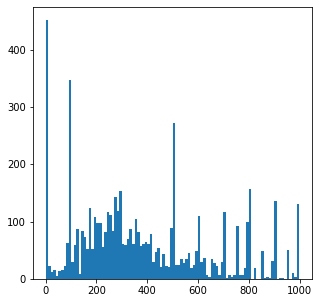

In [219]:
# Let's look at the histogram distribution broken out by every $10 within the first $1,000.

fig = plt.figure(figsize=(5,5))
plt.hist(cheap_df['price'],100)


In [220]:
# We see spikes in listings at $1, $100, $250, $500, and $800. 
# Since we are looking at vehicle listings, it is reasonable to limit the lower end at $250

clean_listings_df = clean_listings_df[clean_listings_df['price']>250]
clean_listings_df.shape

# We have now cut down the list to 231,226 listings(-0.9%) ranging in price from $250 to $100,000.

(231266, 9)

<b> Now that we have filtered the dataset on price (231,266 listings between $250 - $100,000), we can look at other metrics.

Let's look at mileage. </b>

{'whiskers': [<matplotlib.lines.Line2D at 0x1ebae4610>,
 'caps': [<matplotlib.lines.Line2D at 0x2102e7a10>,
 'boxes': [<matplotlib.lines.Line2D at 0x2102e79d0>],
 'medians': [<matplotlib.lines.Line2D at 0x1ebaedad0>],
 'fliers': [],
 'means': []}

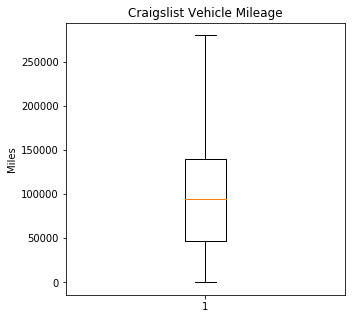

In [180]:
# Let's visualize odometer readings

fig = plt.figure(figsize=(5,5))
plt.title("Craigslist Vehicle Mileage")
plt.ylabel("Miles")
plt.boxplot('odometer', data=clean_listings_df,showfliers=False)

In [181]:
# Let's look at descriptive statistics

clean_listings_df['odometer'].describe()

count    2.321020e+05
mean     1.006456e+05
std      1.132431e+05
min      0.000000e+00
25%      4.639700e+04
50%      9.400000e+04
75%      1.398022e+05
max      1.000000e+07
Name: odometer, dtype: float64

(array([9.400e+02, 1.303e+03, 7.400e+02, 6.950e+02, 5.190e+02, 3.770e+02,
        3.640e+02, 2.660e+02, 1.990e+02, 1.290e+02, 7.700e+01, 3.300e+01,
        2.300e+01, 9.000e+00, 3.000e+00, 2.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

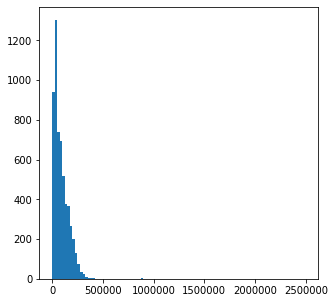

In [221]:
# Let's view this in a histogram

fig = plt.figure(figsize=(5,5))
plt.hist(cheap_df['odometer'],100)

# We see that almost all the listings are under 500,000 miles.

In [222]:
# The low end of this data set appears reasonable. The box and whiskers plot shows values beyond 250,000 or so miles to be outliers. 
# Let's see how many data points fall in this category.

clean_listings_df[clean_listings_df['odometer']>250000] 

# There are 3,633 listings with over 250,000 miles.

,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission
4,7184712241,16995,2007.0,gmc,sierra classic 2500hd,diesel,254217.0,clean,automatic
9,7184708752,12995,2004.0,ram,2500,diesel,309621.0,clean,automatic
22,7184570302,7500,2009.0,ford,f-150,gas,271000.0,clean,automatic
28,7195084414,9900,2003.0,chevrolet,silverado,diesel,299000.0,clean,automatic
58,7183953590,4725,2012.0,toyota,camry le,gas,262000.0,clean,automatic
...,...,...,...,...,...,...,...,...,...
423483,7183988157,4995,2004.0,ford,excursion,gas,287000.0,clean,automatic
423641,7195187671,3700,1995.0,ford,f250,diesel,270000.0,clean,manual
423673,7183364862,11990,2008.0,ford,super duty f-250,diesel,274000.0,clean,automatic
423795,7186061752,1200,2004.0,saturn,vue,gas,322000.0,clean,manual


In [223]:
# Let's remove outliers over 250,000 miles
clean_listings_df = clean_listings_df[clean_listings_df['odometer']<250000]
clean_listings_df.describe()

# We now have a dataset of 227,475 listings (-1.6%)

,id,price,year,odometer
count,2.274750e+05,227475.000000,227475.000000,227475.000000
mean,7.189038e+09,15910.989827,2011.115964,95465.989150
std,4.759653e+06,12422.730282,7.636114,57781.157951
min,7.178302e+09,251.000000,1911.000000,0.000000
25%,7.185433e+09,6990.000000,2008.000000,45798.000000
50%,7.190007e+09,12950.000000,2013.000000,92856.000000
75%,7.193339e+09,20994.000000,2016.000000,137000.000000
max,7.195225e+09,99999.000000,2021.000000,249999.000000


(array([6264., 3669., 5268., 5814., 6460., 7025., 7396., 7288., 6596.,
        5932., 5467., 5308., 5892., 5784., 6267., 6323., 6472., 6308.,
        7330., 7297., 6707., 6177., 6251., 6302., 6239., 6023., 6235.,
        5367., 5565., 4684., 4707., 4392., 4062., 3774., 3674., 3130.,
        2986., 2504., 2159., 1965., 2159., 1543., 1244., 1023., 1068.,
         865.,  822.,  600.,  604.,  484.]),
 array([     0.  ,   4999.98,   9999.96,  14999.94,  19999.92,  24999.9 ,
         29999.88,  34999.86,  39999.84,  44999.82,  49999.8 ,  54999.78,
         59999.76,  64999.74,  69999.72,  74999.7 ,  79999.68,  84999.66,
         89999.64,  94999.62,  99999.6 , 104999.58, 109999.56, 114999.54,
        119999.52, 124999.5 , 129999.48, 134999.46, 139999.44, 144999.42,
        149999.4 , 154999.38, 159999.36, 164999.34, 169999.32, 174999.3 ,
        179999.28, 184999.26, 189999.24, 194999.22, 199999.2 , 204999.18,
        209999.16, 214999.14, 219999.12, 224999.1 , 229999.08, 234999.06,
        

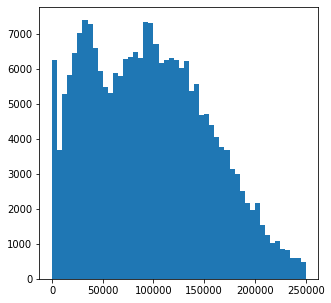

In [224]:
# Let's take a look at a histogram of the remaining listings.

fig = plt.figure(figsize=(5,5))
plt.hist(clean_listings_df['odometer'],50)

# This looks good. We can move on to the next metric.

<b> Now that we have filtered the dataset on price and mileage (227,475 listings between $250 - $100,000 with under 250,000 miles), let's look at the range of years.

Based on the descriptive statics from before, we can expect the values to be skewed towards newer cars. Let's try and filter our dataset </b>



In [225]:
# Let's look at the remaining unique values for the categorical columns again.

# Categorical Columns
print('Categorical Columns: \n\n')
print(f'Unique Years: ',clean_listings_df.year.unique(),'\n')
print(f'Unique Manufacturers: ',clean_listings_df.manufacturer.unique(),'\n')
print(f'Unique Models: ',clean_listings_df.model.unique(),'\n')
print(f'Unique Fuel Types: ',clean_listings_df.fuel.unique(),'\n')
print(f'Unique Title Statuses: ',clean_listings_df.title_status.unique(),'\n')
print(f'Unique Transmission Types: ',clean_listings_df.transmission.unique(),'\n\n')

# Numberical Columns
print('Numerical Columns: \n\n')
clean_listings_df.describe()

Categorical Columns: 


Unique Years:  [2000. 2013. 2012. 2010. 2011. 2014. 2009. 2008. 1994. 1997. 2007. 2019.
 2015. 2016. 2006. 2017. 2005. 1964. 1998. 2001. 2002. 2004. 2018. 1989.
 2003. 1990. 1967. 1992. 1993. 1999. 1986. 1995. 1996. 2020. 1963. 1966.
 1983. 1972. 1952. 1987. 1981. 1991. 1979. 1960. 1927. 1973. 1977. 1969.
 1982. 1953. 1978. 1988. 1957. 1968. 1984. 1934. 1980. 1985. 1970. 1974.
 1971. 1962. 2021. 1965. 1919. 1939. 1948. 1940. 1975. 1950. 1976. 1959.
 1930. 1932. 1955. 1956. 1951. 1949. 1929. 1954. 1923. 1931. 1933. 1936.
 1941. 1921. 1947. 1958. 1946. 1961. 1937. 1935. 1926. 1928. 1924. 1938.
 1911. 1942.] 

Unique Manufacturers:  ['gmc' 'hyundai' 'toyota' 'ford' 'chevrolet' 'buick' 'jeep' 'subaru'
 'nissan' 'dodge' 'audi' 'rover' 'lexus' 'honda' 'ram' 'mini'
 'mercedes-benz' 'cadillac' 'bmw' 'kia' 'volvo' 'jaguar' 'chrysler'
 'acura' 'mitsubishi' 'mazda' 'volkswagen' 'pontiac' 'lincoln' 'infiniti'
 'saturn' 'mercury' 'fiat' 'tesla' 'ferrari' 'land rover'
 'harle

,id,price,year,odometer
count,2.274750e+05,227475.000000,227475.000000,227475.000000
mean,7.189038e+09,15910.989827,2011.115964,95465.989150
std,4.759653e+06,12422.730282,7.636114,57781.157951
min,7.178302e+09,251.000000,1911.000000,0.000000
25%,7.185433e+09,6990.000000,2008.000000,45798.000000
50%,7.190007e+09,12950.000000,2013.000000,92856.000000
75%,7.193339e+09,20994.000000,2016.000000,137000.000000
max,7.195225e+09,99999.000000,2021.000000,249999.000000


(array([1.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00, 2.0000e+00,
        8.0000e+00, 1.0000e+00, 2.1000e+01, 2.5000e+01, 2.2000e+01,
        1.4000e+01, 2.0000e+01, 1.5000e+01, 5.0000e+01, 1.0000e+00,
        1.0000e+01, 3.0000e+01, 3.7000e+01, 1.6000e+01, 2.9000e+01,
        1.1600e+02, 2.7000e+01, 4.0000e+01, 1.4300e+02, 1.7700e+02,
        3.2000e+02, 2.5200e+02, 2.0500e+02, 1.7800e+02, 1.6300e+02,
        4.3700e+02, 1.7800e+02, 1.8700e+02, 3.5600e+02, 4.3700e+02,
        7.6400e+02, 5.4000e+02, 8.9500e+02, 1.2440e+03, 1.9860e+03,
        6.2150e+03, 7.8240e+03, 1.2455e+04, 1.8412e+04, 1.9284e+04,
        3.7685e+04, 3.1286e+04, 3.1368e+04, 3.7165e+04, 1.6833e+04]),
 array([1911. , 1913.2, 1915.4, 1917.6, 1919.8, 1922. , 1924.2, 1926.4,
        1928.6, 1930.8, 1933. , 1935.2, 1937.4, 1939.6, 1941.8, 1944. ,
        1946.2, 1948.4, 1950.6, 1952.8, 1955. , 1957.2, 1959.4, 1961.6,
        1963.8, 1966. , 1968.2, 1970.4, 1972.6, 1974.8, 1977. , 1979.2,
        1981.4, 1983.6, 1985.8

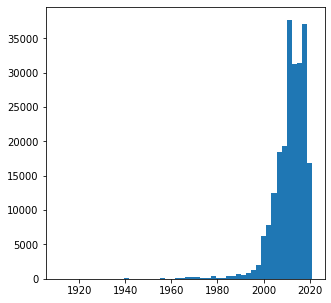

In [226]:
# Let's look at a histogram of the model years

fig = plt.figure(figsize=(5,5))
plt.hist(clean_listings_df['year'],50)

In [232]:
clean_listings_df[clean_listings_df['year']<1985] 


,id,price,year,manufacturer,model,fuel,odometer,title_status,transmission
50,7184080602,27000,1964.0,dodge,polara,gas,36000.0,clean,automatic
118,7187986347,26500,1967.0,chevrolet,c-10,gas,500.0,clean,automatic
330,7180617522,7200,1963.0,chevrolet,corvair monza,gas,105311.0,clean,manual
496,7185637009,2500,1966.0,ford,f100,gas,100755.0,clean,manual
663,7185170223,7000,1963.0,pontiac,tempest,gas,96000.0,clean,manual
...,...,...,...,...,...,...,...,...,...
423769,7186741190,4500,1977.0,buick,lesabre,gas,96660.0,clean,automatic
423776,7193488655,60000,1970.0,mercedes-benz,280 sl,gas,71000.0,clean,automatic
423802,7195143461,6500,1983.0,toyota,pick up diesel,diesel,165103.0,clean,manual
423811,7185734413,28000,1957.0,chevrolet,210 coupe,gas,96731.0,clean,manual


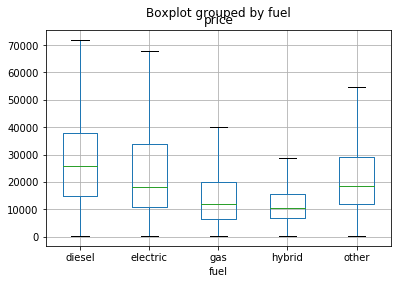

In [252]:
clean_listings_df.boxplot('price', 'fuel', showfliers=False)

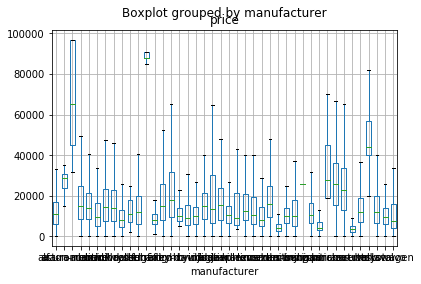

In [257]:
clean_listings_df.boxplot('price', 'manufacturer', widths=.6, showfliers=False)

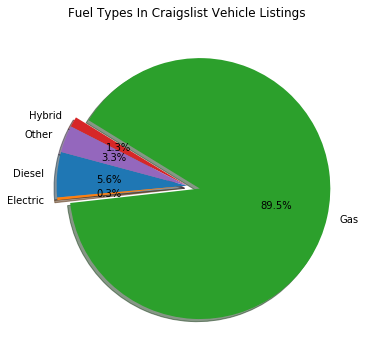

In [271]:
fuel_percents = 100 * clean_listings_df.groupby(["fuel"]).sum()["year"] /clean_listings_df["year"].sum()


# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(fuel_percents,
    labels=["Diesel", "Electric", "Gas", "Hybrid", "Other"],
    explode=[0, 0, 0.1,0,0],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("Fuel Types In Craigslist Vehicle Listings")


# Show Figure
plt.show()

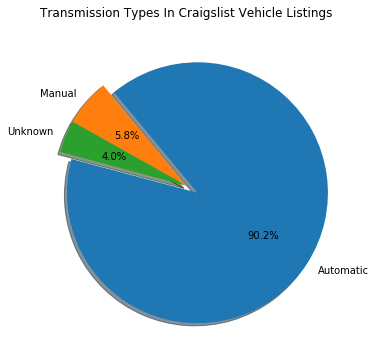

In [276]:
transmission_percents = 100 * clean_listings_df.groupby(["transmission"]).sum()["year"] /clean_listings_df["year"].sum()


# Build percentage of rides by city type pie chart.
plt.subplots(figsize=(10, 6))
plt.pie(transmission_percents,
    labels=["Automatic", "Manual", "Unknown"],
    explode=[0.1, 0, 0],
    autopct='%1.1f%%',
    shadow=True, startangle=165)
plt.title("Transmission Types In Craigslist Vehicle Listings")


# Show Figure
plt.show()

fuel
diesel       5.609271
electric     0.321252
gas         89.466480
hybrid       1.270204
other        3.332793
Name: year, dtype: float64